In [1]:
import numpy as np
import pandas as pd
import xpress as xp


## 1. Data Exploration

In [48]:
# read-data
TransactionsInput = pd.read_excel("231013_Transactions_Input.xlsx")

In [3]:
FuardCases = pd.read_excel("231013_Fraud_Cases.xlsx")
CustomerBase = pd.read_excel("231013_Customer_Base.xlsx")

In [4]:
TransactionsInput["description"].nunique()

347

In [5]:
TransactionsInput

,transaction_id,description,Amount,category,date,month,customer_id,type,In_or_Out,bank_to,bank_from,transac_prob,description_prob,priority
0,1,Salary Deposit - XYZ Corporation,11474.33021,Income,2023-10-01,October,17699,income,paid_in,bank_A,bank_A,NaN,NaN,3
1,2,Online Retailer - Electronics Purchase,199.99000,Online Shopping,2023-10-01,October,10298,spending,paid_out,bank_A,bank_E,0.78,0.25,3
2,3,Utilities Payment - Internet Service,60.00000,Utilities,2023-10-01,October,10298,spending,paid_out,bank_C,bank_E,0.30,0.22,1
3,4,Rent Payment,1500.00000,Housing,2023-10-01,October,14507,spending,paid_out,bank_D,bank_E,0.57,0.53,3
4,5,Paycheck Deposit - Company Name,10480.68449,Income,2023-10-01,October,14507,income,paid_in,bank_E,bank_D,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315177,315178,Grocery Shopping - Super Value Mart,55.25000,Groceries,2024-07-31,July,15026,spending,paid_out,bank_C,bank_B,0.42,0.17,1
315178,315179,JCPenney - Discount Fashion,40.00000,Shopping,2024-07-31,July,11908,spending,paid_out,bank_D,bank_A,0.36,0.36,1
315179,315180,Gas Station - Fuel Purchase,40.45000,Transportation,2024-07-31,July,10291,spending,paid_out,bank_D,bank_D,0.28,0.64,1
315180,315181,ATM Withdrawal - PQR Bank ATM,80.00000,Cash Withdrawal,2024-07-31,July,18543,spending,paid_out,NaN,bank_A,0.24,0.23,2


In [6]:
CustomerBase

,customer_id,home_bank,customer_prob
0,10298,bank_E,0.49
1,14507,bank_E,0.35
2,14558,bank_E,0.45
3,13453,bank_E,0.63
4,19629,bank_D,0.79
...,...,...,...
480,15364,bank_E,0.42
481,13462,bank_A,0.53
482,18020,bank_E,0.38
483,16643,bank_B,0.26


In [7]:
# TransactionsInput_clean = TransactionsInput.drop('description_prob', axis=1)
# TransactionsInput_clean = TransactionsInput.drop(TransactionsInput[TransactionsInput['In_or_Out'] == 'paid_in'].index)


In [8]:
FuardCases

,transaction_id,is_scam_transaction,fraud_type,case_id
0,187,1,AdvanceFee,5415844
1,247,1,Impersonation,4280670
2,818,1,Impersonation,6956462
3,891,1,Purchase,2702984
4,1142,1,Purchase,3493741
...,...,...,...,...
2476,313591,1,Impersonation,5711663
2477,314245,1,AdvanceFee,8032096
2478,314259,1,Purchase,1154155
2479,314411,1,AdvanceFee,4460117


### Find the seasonality

In [9]:
Fuard_time = pd.merge(TransactionsInput,FuardCases, on="transaction_id")[["date","month"]]
Fuard_time['month'] = Fuard_time.apply(lambda row: row['month'] + str(row['date'].year), axis=1)
unique_date, counts_date = np.unique(Fuard_time[['date']], return_counts=True)
unique_month, counts_month = np.unique(Fuard_time[['month']], return_counts=True)
frequency_date = dict(zip(unique_date, counts_date))
frequency_month = dict(zip(unique_month, counts_month))  
print(frequency_date)
print(frequency_month)

{numpy.datetime64('2023-10-01T00:00:00.000000000'): 18, numpy.datetime64('2023-10-02T00:00:00.000000000'): 6, numpy.datetime64('2023-10-03T00:00:00.000000000'): 20, numpy.datetime64('2023-10-04T00:00:00.000000000'): 7, numpy.datetime64('2023-10-05T00:00:00.000000000'): 8, numpy.datetime64('2023-10-06T00:00:00.000000000'): 8, numpy.datetime64('2023-10-07T00:00:00.000000000'): 4, numpy.datetime64('2023-10-08T00:00:00.000000000'): 8, numpy.datetime64('2023-10-09T00:00:00.000000000'): 9, numpy.datetime64('2023-10-10T00:00:00.000000000'): 6, numpy.datetime64('2023-10-11T00:00:00.000000000'): 5, numpy.datetime64('2023-10-12T00:00:00.000000000'): 13, numpy.datetime64('2023-10-13T00:00:00.000000000'): 7, numpy.datetime64('2023-10-14T00:00:00.000000000'): 8, numpy.datetime64('2023-10-15T00:00:00.000000000'): 9, numpy.datetime64('2023-10-16T00:00:00.000000000'): 6, numpy.datetime64('2023-10-17T00:00:00.000000000'): 6, numpy.datetime64('2023-10-18T00:00:00.000000000'): 8, numpy.datetime64('2023-1

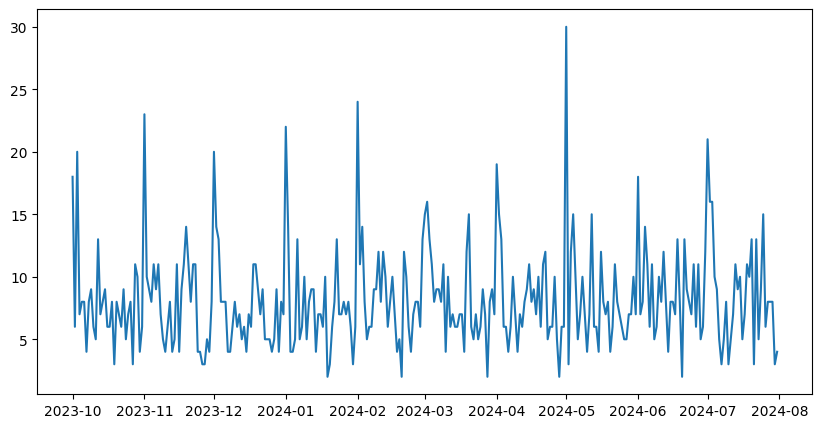

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(unique_date,counts_date)

In [11]:
# in proportion
TransactionsInput['if_fraud'] = TransactionsInput['transaction_id'].apply(lambda x: 1 if x in FuardCases['transaction_id'].values else 0)
TransactionsInput_ratio = TransactionsInput[["date","if_fraud"]]


In [12]:
label_ratio = TransactionsInput_ratio.groupby('date')['if_fraud'].mean()
label_ratio

date
2023-10-01    0.007453
2023-10-02    0.004386
2023-10-03    0.014524
2023-10-04    0.006162
2023-10-05    0.008584
                ...   
2024-07-27    0.008621
2024-07-28    0.008547
2024-07-29    0.009313
2024-07-30    0.003036
2024-07-31    0.004264
Name: if_fraud, Length: 305, dtype: float64

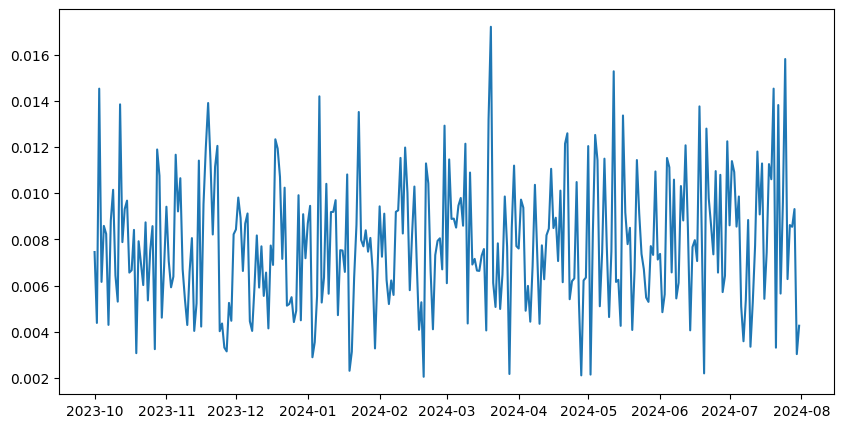

In [13]:
plt.figure(figsize=(10,5))
plt.plot(unique_date,label_ratio)

In [14]:
# TransactionsInput_clean = TransactionsInput_clean[["In_or_Out"] == "paid_in"]

## 2. Create a problem with xpress module

#### 2.1 The basic model in a single day. (Ignore the learn model)

In [50]:
# prepare data
# https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandaabss/
TransactionsInput_label_id = np.array(FuardCases["transaction_id"])
TransactionsInput = TransactionsInput
TransactionsInput["is_fraud"] = 0
TransactionsInput["is_fraud"].loc[TransactionsInput_label_id-1] = 1

TransactionsInput_clean = TransactionsInput.drop(TransactionsInput[TransactionsInput['In_or_Out'] == 'paid_in'].index)
TransactionsInput_clean = pd.merge(TransactionsInput_clean, CustomerBase, on='customer_id', how='left')

# investigation time dataframe
Inestigation_time = pd.DataFrame(data={'priority':[1, 2, 3, 4], 'investigation_time':[0.25, 0.5, 1, 2]}, index=([0, 1, 2, 3]))

# merge inverstigation time with the input data
TransactionsInput_clean = pd.merge(TransactionsInput_clean, Inestigation_time, on='priority', how='left')

# investigation  dataframe
Inestigation_hire = pd.DataFrame(data={'priority':[1, 2, 3, 4], 'investigation_hire':[40, 60, 100, 150]}, index=([0, 1, 2, 3]))

# merge inverstigation time with the input data
TransactionsInput_clean = pd.merge(TransactionsInput_clean, Inestigation_hire, on='priority', how='left')

C:\Users\Eliza\AppData\Local\Temp\ipykernel_27940\3373952395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TransactionsInput["is_fraud"].loc[TransactionsInput_label_id-1] = 1


In [51]:
date_list = pd.to_datetime(TransactionsInput_clean['date']).dt.date
# date_list.unique()
formatted_dates = date_list.apply(lambda date: date.strftime('%Y-%m-%d'))
date_list = formatted_dates.unique()

date = date_list[0]
TransactionsInput_clean[TransactionsInput_clean['date'] == date]

,transaction_id,description,Amount,category,date,month,customer_id,type,In_or_Out,bank_to,bank_from,transac_prob,description_prob,priority,is_fraud,home_bank,customer_prob,investigation_time,investigation_hire
0,2,Online Retailer - Electronics Purchase,199.99,Online Shopping,2023-10-01,October,10298,spending,paid_out,bank_A,bank_E,0.78,0.25,3,0,bank_E,0.49,1.00,100
1,3,Utilities Payment - Internet Service,60.00,Utilities,2023-10-01,October,10298,spending,paid_out,bank_C,bank_E,0.30,0.22,1,0,bank_E,0.49,0.25,40
2,4,Rent Payment,1500.00,Housing,2023-10-01,October,14507,spending,paid_out,bank_D,bank_E,0.57,0.53,3,0,bank_E,0.35,1.00,100
3,6,Online Retailer - Electronics Purchase,299.99,Online Shopping,2023-10-01,October,14507,spending,paid_out,bank_E,bank_E,0.75,0.65,3,0,bank_E,0.35,1.00,100
4,7,Asos - Online Fashion Shopping,55.00,Shopping,2023-10-01,October,14507,spending,paid_out,bank_B,bank_E,0.37,0.31,1,0,bank_E,0.35,0.25,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,2410,Credit Card Payment - American Express **** 5678,175.00,Credit Card Payment,2023-10-01,October,17647,spending,paid_out,Intrnl,bank_D,0.66,0.36,4,0,bank_D,0.70,2.00,150
1868,2412,Home Improvement - Paint and Supplies,110.75,Home Improvement,2023-10-01,October,17031,spending,paid_out,bank_E,bank_A,0.43,0.46,2,0,bank_A,0.58,0.50,60
1869,2413,Rent Payment,1200.00,Housing,2023-10-01,October,17699,spending,paid_out,bank_D,bank_A,0.64,0.38,3,0,bank_A,0.66,1.00,100
1870,2414,Credit Card Payment - Mastercard **** 6789,150.50,Credit Card Payment,2023-10-01,October,17390,spending,paid_out,Intrnl,bank_D,0.66,0.68,4,0,bank_D,0.45,2.00,150


### 2.2 Abstract the test set for testing the code - only use first 10 transactios

In [17]:

TransactionsInput_clean_test = TransactionsInput_clean[0:10]
TransactionsInput_clean_test


,transaction_id,description,Amount,category,date,month,customer_id,type,In_or_Out,bank_to,bank_from,transac_prob,description_prob,priority,if_fraud,home_bank,customer_prob,investigation_time,investigation_hire
0,2,Online Retailer - Electronics Purchase,199.99,Online Shopping,2023-10-01,October,10298,spending,paid_out,bank_A,bank_E,0.78,0.25,3,0,bank_E,0.49,1.00,100
1,3,Utilities Payment - Internet Service,60.00,Utilities,2023-10-01,October,10298,spending,paid_out,bank_C,bank_E,0.30,0.22,1,0,bank_E,0.49,0.25,40
2,4,Rent Payment,1500.00,Housing,2023-10-01,October,14507,spending,paid_out,bank_D,bank_E,0.57,0.53,3,0,bank_E,0.35,1.00,100
3,6,Online Retailer - Electronics Purchase,299.99,Online Shopping,2023-10-01,October,14507,spending,paid_out,bank_E,bank_E,0.75,0.65,3,0,bank_E,0.35,1.00,100
4,7,Asos - Online Fashion Shopping,55.00,Shopping,2023-10-01,October,14507,spending,paid_out,bank_B,bank_E,0.37,0.31,1,0,bank_E,0.35,0.25,40
5,9,Fuel Purchase - Gas Station,42.75,Transportation,2023-10-01,October,14507,spending,paid_out,bank_E,bank_E,0.39,0.44,1,0,bank_E,0.35,0.25,40
6,10,Fuel Purchase - Gas Station,45.60,Transportation,2023-10-01,October,14507,spending,paid_out,bank_A,bank_E,0.24,0.21,1,0,bank_E,0.35,0.25,40
7,11,Phone Bill Payment - Wireless Provider,70.00,Utilities,2023-10-01,October,14507,spending,paid_out,bank_A,bank_E,0.38,0.16,1,0,bank_E,0.35,0.25,40
8,12,Phone Bill Payment - Mobile Co.,65.00,Utilities,2023-10-01,October,14558,spending,paid_out,bank_A,bank_E,0.57,0.30,1,0,bank_E,0.45,0.25,40
9,13,Rent Payment,1500.00,Housing,2023-10-01,October,14558,spending,paid_out,bank_C,bank_E,0.63,0.41,3,0,bank_E,0.45,1.00,100


### 2.3 Prepare the data

In [18]:
# # data (parameeters) needed in this problem
# # NOTE THAT: very strightforward way in this case as this is the idea stage.
# # still need to abstract the single instead of a whole data set
# x_length = len(TransactionsInput_clean_test["transaction_id"])
# y_length = len(TransactionsInput_clean_test["transaction_id"])
# Prob_transac = TransactionsInput_clean_test["transac_prob"]
# # Prob_description = TransactionsInput_clean_test["description_prob"]  

# Customer_test = pd.merge(TransactionsInput_clean_test, CustomerBase, on="customer_id", how="left")[['transaction_id','customer_id','home_bank','customer_prob']]
# Prob_customer = Customer_test["customer_prob"]

# # bank here is used to distribute the investigation resiponsibility
# B = ["bank_A","bank_B","bank_C","bank_D","bank_E"]
# Bank_to = TransactionsInput_clean_test["bank_to"]
# Bank_from = TransactionsInput_clean_test["bank_from"]

# # Parameters
# Bank = ["A", "B", "C", "D", "E"]
Investigarion_team = [8, 12, 10, 10, 10]

# Priority = TransactionsInput_clean_test["priority"]
# # Investigation_time_dict = {1:0.25, 2:0.5, 3:1, 4:2} 
# # Investigation_hire_exter_dict = {1:40, 2:60, 3:100, 4:150} 
# # Investigation_target_success = {1:0.5, 2:0.6, 3:0.7, 4:0.8}


In [19]:
# one-hot encoding
# decide which bank will join the investigation
B = ["bank_A","bank_B","bank_C","bank_D","bank_E"]
Bank_to = TransactionsInput_clean_test["bank_to"]
Bank_from = TransactionsInput_clean_test["bank_from"]

Bank_to_onehot = pd.get_dummies(Bank_to, dtype=int)
Bank_from_onehot = pd.get_dummies(Bank_from, dtype=int)
array_1 = Bank_to_onehot+Bank_from_onehot
array_2 = Bank_to_onehot+Bank_from_onehot

# find p4 row
p4 = TransactionsInput_clean_test[TransactionsInput_clean_test["priority"] == 4].index
array_1.loc[p4] = 0

# construct the constraints to pirority 4
not_p4 = TransactionsInput_clean_test.index.difference(p4)
array_2.loc[not_p4] = 0



### 2.4 Define the daily model function

In [ ]:
def daily_moel(alpha, beta_trans, beta_customer, TransactionsInput_clean_test, C4_cont,inve_team_size):
    # Create a problem called transaction
    prob = xp.problem(name='transaction_daily') 

    # declaration
    number_of_transactions = len(TransactionsInput_clean_test)
    # number_of_priorities = 4
    number_of_banks = 5
    transactions = range(number_of_transactions)
    # priorities = range(number_of_priorities)
    banks = range(number_of_banks)

    # prepare the data
    # decide which bank will join the investigation
    Bank_to = TransactionsInput_clean_test["bank_to"]
    Bank_from = TransactionsInput_clean_test["bank_from"]
    Bank_to_onehot = pd.get_dummies(Bank_to, dtype=int)
    Bank_from_onehot = pd.get_dummies(Bank_from, dtype=int)
    array_1 = np.add(Bank_to_onehot, Bank_from_onehot)
    array_2 = np.add(Bank_to_onehot, Bank_from_onehot)

    # find p4 row
    p4 = TransactionsInput_clean_test[TransactionsInput_clean_test["priority"] == 4].index
    array_1.loc[p4] = 0
    trans_array_1 = array_1.T
    # trans_array_1 = np.array(trans_array_1)
    trans_array_1 = np.nan_to_num(trans_array_1)

    # find not p4 row
    not_p4 = TransactionsInput_clean_test.index.difference(p4)
    array_2.loc[not_p4] = 0
    trans_array_2 = array_2.T
    # trans_array_2 = np.array(trans_array_2)
    trans_array_2 = np.nan_to_num(trans_array_2)

    # investigation time and hire cose
    Investigation_time = np.array(TransactionsInput_clean_test["investigation_time"])
    Investigation_hire = np.array(TransactionsInput_clean_test["investigation_hire"])

    # value
    value =np.array(TransactionsInput_clean_test["Amount"])

    # prbability
    TP = np.array(TransactionsInput_clean_test["transac_prob"])
    TP = np.nan_to_num(TP)
    CP = np.array(TransactionsInput_clean_test["customer_prob"])
    CP = np.nan_to_num(CP)

    # add variables
    X = np.array([xp.var(vartype=xp.binary, name='X_{0}_{1}'.format(b+1, i+1)) 
                    for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    X4 = np.array([xp.var(vartype=xp.binary, name='X4_{0}_{1}'.format(b+1, i+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z = np.array([xp.var(vartype=xp.binary, name='Z_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z4 = np.array([xp.var(vartype=xp.binary, name='Z4_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    C = np.array([xp.var(vartype=xp.integer, name='C_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )
    C4 = np.array([xp.var(vartype=xp.integer, name='C4_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )

    prob.addVariable(X, X4, Z, Z4, C, C4)

    # set constraints
    prob.addConstraint(X[b,i] + X4[b,i] + Z[b,i] + Z4[b,i] <= 1 for i in transactions for b in banks)

    prob.addConstraint(xp.Sum(X[b,i] * Investigation_time[i] for i in transactions) <= C[b] for b in banks)
    prob.addConstraint(xp.Sum(X4[b,i] * Investigation_time[i] for i in transactions ) <= C4[b] for b in banks)

    prob.addConstraint((C[n] + C4[n] + C4_cont[n]) <= inve_team_size[n] for n in banks)

    prob.addConstraint(X[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(X4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)

    prob.addConstraint(xp.Sum(Z[n] + Z4[n] for n in banks) <= alpha)

    # set objective function
    prob.setObjective(xp.Sum(value[i]*(beta_trans*TP[i] + beta_customer*CP[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
                  + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks),
                    sense=xp.minimize)

    # get solution
    prob.solve()

    x_optimal = prob.getSolution(X)
    x_4_optimal = prob.getSolution(X4)
    Ex_hire_optimal = prob.getSolution(Z)
    Ex_hire_4_optimal = prob.getSolution(Z4)
    C4_cont = prob.getSolution(C4)

    cost = prob.getObjVal()
    
    
    return x_optimal, x_4_optimal, Ex_hire_optimal, Ex_hire_4_optimal, cost, C4_cont 
    # return 


In [21]:
C4_cont = [0,0,0,0,0]
cost = daily_moel(2,0.5, 0.5, TransactionsInput_clean_test,C4_cont,Investigarion_team)
print(cost)

Using the license file found in your Xpress installation. If you want to use this license and no longer want to see this message, use the following code before using the xpress module:
  xpress.init('D:/APP/Xpress/bin/xpauth.xpr')
FICO Xpress v9.2.2, Hyper, solve started 12:20:51, Nov 23, 2023
Heap usage: 474KB (peak 488KB, 120KB system)
Minimizing MILP transaction_daily using up to 20 threads and up to 15GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
       275 rows          210 cols          620 elements       210 entities
Presolved problem has:
         0 rows            0 cols            0 elements         0 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 497KB (peak 679KB, 120KB system)
Will try to keep branch and bound tree memory usage below 8.6GB
Starting concurrent solve with dual (1 thread)

 Concurrent-Solve,   0s
            Dual        
    objective   dual inf
 D  7693.8306   .0000000
------- optimal --------
Concur

In [22]:
# add objective value
# expect value on investigation cost
# prob_daily.addObjective()

In [23]:
# add constraints
# prob_daily.addConstraint(i for i in x_length x[i]*Investigation_time[Priority[i]-1] <= sum(c))
# prob_daily.addConstraint(all(x[i] * Investigation_time[Priority[i]-1] <= sum(Bank_to_onehot[b, i] * c[b, i] + Bank_from_onehot[b, i] * c[b, i] for b in B) for i in range(len(TransactionsInput_clean_test))))
# dimension

## 3. Construct the optimal model

### 3.1 label the Fraud transaction

In [24]:
FuardCases

,transaction_id,is_scam_transaction,fraud_type,case_id
0,187,1,AdvanceFee,5415844
1,247,1,Impersonation,4280670
2,818,1,Impersonation,6956462
3,891,1,Purchase,2702984
4,1142,1,Purchase,3493741
...,...,...,...,...
2476,313591,1,Impersonation,5711663
2477,314245,1,AdvanceFee,8032096
2478,314259,1,Purchase,1154155
2479,314411,1,AdvanceFee,4460117


### 3.2 Construct the optimal model

In [89]:
def optimal_model(TransactionsInput_clean_test, C4_cont, inve_team_size):
    # Create a problem called transaction
    prob = xp.problem(name='transaction_daily') 

    # declaration
    number_of_transactions = len(TransactionsInput_clean_test)
    # number_of_priorities = 4
    number_of_banks = 5
    transactions = range(number_of_transactions)
    # priorities = range(number_of_priorities)
    banks = range(number_of_banks)

    # prepare the data
    # decide which bank will join the investigation
    Bank_to = TransactionsInput_clean_test["bank_to"]
    Bank_from = TransactionsInput_clean_test["bank_from"]
    Bank_to_onehot = pd.get_dummies(Bank_to, dtype=int)
    Bank_from_onehot = pd.get_dummies(Bank_from, dtype=int)
    array_1 = np.add(Bank_to_onehot, Bank_from_onehot)
    array_2 = np.add(Bank_to_onehot, Bank_from_onehot)

    # find p4 row
    p4 = TransactionsInput_clean_test[TransactionsInput_clean_test["priority"] == 4].index
    array_1.loc[p4] = 0
    trans_array_1 = array_1.T
    # trans_array_1 = np.array(trans_array_1)
    trans_array_1 = np.nan_to_num(trans_array_1)

    # find not p4 row
    not_p4 = TransactionsInput_clean_test.index.difference(p4)
    array_2.loc[not_p4] = 0
    trans_array_2 = array_2.T
    # trans_array_2 = np.array(trans_array_2)
    trans_array_2 = np.nan_to_num(trans_array_2)

    # investigation time and hire cose
    Investigation_time = np.array(TransactionsInput_clean_test["investigation_time"])
    Investigation_hire = np.array(TransactionsInput_clean_test["investigation_hire"])

    # value
    value =np.array(TransactionsInput_clean_test["Amount"])

    # if Fraud
    F = np.array(TransactionsInput_clean_test["is_fraud"])

    # prbability
    TP = np.array(TransactionsInput_clean_test["transac_prob"])
    TP = np.nan_to_num(TP)
    CP = np.array(TransactionsInput_clean_test["customer_prob"])
    CP = np.nan_to_num(CP)

    # add variables
    X = np.array([xp.var(vartype=xp.binary, name='X_{0}_{1}'.format(b+1, i+1)) 
                    for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    X4 = np.array([xp.var(vartype=xp.binary, name='X4_{0}_{1}'.format(b+1, i+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z = np.array([xp.var(vartype=xp.binary, name='Z_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z4 = np.array([xp.var(vartype=xp.binary, name='Z4_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    C = np.array([xp.var(vartype=xp.integer, name='C_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )
    C4 = np.array([xp.var(vartype=xp.integer, name='C4_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )

    prob.addVariable(X, X4, Z, Z4, C, C4)

    # set constraints
    prob.addConstraint(X[b,i] + X4[b,i] + Z[b,i] + Z4[b,i] <= 1 for i in transactions for b in banks)

    prob.addConstraint(xp.Sum(X[b,i] * Investigation_time[i] for i in transactions) <= C[b] for b in banks)
    prob.addConstraint(xp.Sum(X4[b,i] * Investigation_time[i] for i in transactions ) <= C4[b] for b in banks)

    prob.addConstraint((C[n] + C4[n] + C4_cont[n]) <= inve_team_size[n] for n in banks)

    prob.addConstraint(X[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(X4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)


    # set objective function
    # prob.setObjective(xp.Sum(value[i]*(beta_trans*TP[i] + beta_customer*CP[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
    #               + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks),
    #                 sense=xp.minimize)
    prob.setObjective(xp.Sum(value[i]*(F[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
                  + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks),
                    sense=xp.minimize)

    # get solution
    prob.solve()
    print("model start")
    
    # x_optimal = prob.getSolution(X)
    # x_4_optimal = prob.getSolution(X4)
    # Ex_hire_optimal = prob.getSolution(Z)
    # Ex_hire_4_optimal = prob.getSolution(Z4)
    C4_cont = prob.getSolution(C4)

    cost = prob.getObjVal()
    
  
    return cost, C4_cont


In [79]:
# # TEST
# TransactionsInput_clean_test = TransactionsInput_clean[:10]
# TransactionsInput_clean_test
# C4_cont = [0,0,0,0,0]
# optimal_test_cost = optimal_model(TransactionsInput_clean_test, C4_cont, Investigarion_team)

## 4. Find alpha star by grid search

### 4.1 Set the grid search data

In [26]:
# from data exxploration model, we found that there is at most 30 fraud transaction
print("max:", np.max(counts_date))
print("min:", np.min(counts_date))
print("mean:", np.mean(counts_date))
print("median:", np.median(counts_date))

max: 30
min: 2
mean: 8.134426229508197
median: 7.0


In [27]:
alpha_grid = np.arange(0,5)
alpha_grid

array([0, 1, 2, 3, 4])

In [28]:
TransactionsInput_clean

,transaction_id,description,Amount,category,date,month,customer_id,type,In_or_Out,bank_to,bank_from,transac_prob,description_prob,priority,if_fraud,home_bank,customer_prob,investigation_time,investigation_hire
0,2,Online Retailer - Electronics Purchase,199.99,Online Shopping,2023-10-01,October,10298,spending,paid_out,bank_A,bank_E,0.78,0.25,3,0,bank_E,0.49,1.00,100
1,3,Utilities Payment - Internet Service,60.00,Utilities,2023-10-01,October,10298,spending,paid_out,bank_C,bank_E,0.30,0.22,1,0,bank_E,0.49,0.25,40
2,4,Rent Payment,1500.00,Housing,2023-10-01,October,14507,spending,paid_out,bank_D,bank_E,0.57,0.53,3,0,bank_E,0.35,1.00,100
3,6,Online Retailer - Electronics Purchase,299.99,Online Shopping,2023-10-01,October,14507,spending,paid_out,bank_E,bank_E,0.75,0.65,3,0,bank_E,0.35,1.00,100
4,7,Asos - Online Fashion Shopping,55.00,Shopping,2023-10-01,October,14507,spending,paid_out,bank_B,bank_E,0.37,0.31,1,0,bank_E,0.35,0.25,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295727,315178,Grocery Shopping - Super Value Mart,55.25,Groceries,2024-07-31,July,15026,spending,paid_out,bank_C,bank_B,0.42,0.17,1,0,bank_B,0.52,0.25,40
295728,315179,JCPenney - Discount Fashion,40.00,Shopping,2024-07-31,July,11908,spending,paid_out,bank_D,bank_A,0.36,0.36,1,0,bank_A,0.32,0.25,40
295729,315180,Gas Station - Fuel Purchase,40.45,Transportation,2024-07-31,July,10291,spending,paid_out,bank_D,bank_D,0.28,0.64,1,0,bank_D,0.35,0.25,40
295730,315181,ATM Withdrawal - PQR Bank ATM,80.00,Cash Withdrawal,2024-07-31,July,18543,spending,paid_out,NaN,bank_A,0.24,0.23,2,0,bank_A,0.20,0.50,60


In [29]:
date_list = pd.to_datetime(TransactionsInput_clean['date']).dt.date
# date_list.unique()
formatted_dates = date_list.apply(lambda date: date.strftime('%Y-%m-%d'))
date_list = formatted_dates.unique()
# date_list = to_datetime(data['date']) = 

In [30]:
date_list[1]

'2023-10-02'

In [31]:
date = date_list[0]
TransactionsInput_clean_test = TransactionsInput_clean.loc[TransactionsInput['date'] == date]
TransactionsInput_clean_test
# TransactionsInput_clean_idx = [TransactionsInput['date'] == "2024-07-31"].index

,transaction_id,description,Amount,category,date,month,customer_id,type,In_or_Out,bank_to,bank_from,transac_prob,description_prob,priority,if_fraud,home_bank,customer_prob,investigation_time,investigation_hire
0,2,Online Retailer - Electronics Purchase,199.99,Online Shopping,2023-10-01,October,10298,spending,paid_out,bank_A,bank_E,0.78,0.25,3,0,bank_E,0.49,1.00,100
1,3,Utilities Payment - Internet Service,60.00,Utilities,2023-10-01,October,10298,spending,paid_out,bank_C,bank_E,0.30,0.22,1,0,bank_E,0.49,0.25,40
2,4,Rent Payment,1500.00,Housing,2023-10-01,October,14507,spending,paid_out,bank_D,bank_E,0.57,0.53,3,0,bank_E,0.35,1.00,100
3,6,Online Retailer - Electronics Purchase,299.99,Online Shopping,2023-10-01,October,14507,spending,paid_out,bank_E,bank_E,0.75,0.65,3,0,bank_E,0.35,1.00,100
4,7,Asos - Online Fashion Shopping,55.00,Shopping,2023-10-01,October,14507,spending,paid_out,bank_B,bank_E,0.37,0.31,1,0,bank_E,0.35,0.25,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,2973,Transfer from Current to Savings,200.00,Transfers,2023-10-02,October,16364,spending,paid_out,bank_E,bank_E,0.54,0.15,3,0,bank_E,0.27,1.00,100
2411,2974,Phone Bill Payment - Wireless Provider,65.00,Utilities,2023-10-02,October,12684,spending,paid_out,bank_E,bank_E,0.42,0.58,1,0,bank_E,0.36,0.25,40
2412,2975,Amazon Prime Membership Renewal,12.99,Online Shopping,2023-10-02,October,12684,spending,paid_out,bank_A,bank_E,0.36,0.34,1,0,bank_E,0.36,0.25,40
2413,2976,Utilities Payment - Gas and Electric,85.50,Utilities,2023-10-02,October,11528,spending,paid_out,bank_C,bank_A,0.61,0.17,2,0,bank_A,0.21,0.50,60


In [92]:
def parameter_model(cost_optimal ,X ,X4 ,Z ,Z4 , TransactionsInput_clean_test):
    # declaration
    number_of_transactions = len(TransactionsInput_clean_test)
    # number_of_priorities = 4
    number_of_banks = 5
    transactions = range(number_of_transactions)
    # priorities = range(number_of_priorities)
    banks = range(number_of_banks)

    # if Fraud
    F = np.array(TransactionsInput_clean_test["is_fraud"])

    # investigation hire cose
    Investigation_hire = np.array(TransactionsInput_clean_test["investigation_hire"])

    # value
    value =np.array(TransactionsInput_clean_test["Amount"])
    # for i in transactions:
    #     for b in banks:
    #         value[i]
    #         prob.setObjective(xp.Sum(value[i]*(F[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
    #               + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks),
    #                 sense=xp.maximize)
    
    cost_daily = sum(value[i]*(F[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
                  + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks)

    difference_now = abs(cost_optimal - cost_daily)
    
    return difference_now

In [78]:
len(date_list)

305

In [99]:
alpha_star = list()
difference_daily = list()
date_list_test = date_list[60:120]
number_of_transaction = list()
C4_cont = np.array([0]*5)
C4_cont_optimal = np.array([0]*5)
for date in date_list_test:
    print(date)
    TransactionsInput_clean_test = TransactionsInput_clean.loc[TransactionsInput['date'] == date]
    difference_min = float("inf")
    difference = list()
    cost_optimal, C4_cont_optimal = optimal_model(TransactionsInput_clean_test, C4_cont_optimal, Investigarion_team)
    print(cost_optimal,C4_cont_optimal)
    for alpha in alpha_grid:
        X ,X4 ,Z ,Z4, cost, C4_cont = daily_moel(alpha,0.5, 0.5, TransactionsInput_clean_test, C4_cont, Investigarion_team)

        # claim the data

        # find the case that is the closest the the real
        difference_now = parameter_model(cost_optimal ,X ,X4 ,Z ,Z4 , TransactionsInput_clean_test)

        difference.append(difference_now)
        if difference_now < difference_min:
            difference_min = difference_now
            alpha_best = alpha
        # cost.append(daily_moel(alpha,0.5, 0.5, TransactionsInput_clean_test,C4_cont,Investigarion_team))
        print(difference_min, alpha_best)
    difference_daily.append(cost)
    number_of_transaction.append(len(TransactionsInput_clean_test))
    alpha_star.append(alpha_best)

2023-11-30
FICO Xpress v9.2.2, Hyper, solve started 16:11:43, Nov 23, 2023
Heap usage: 11MB (peak 11MB, 5045KB system)
Minimizing MILP transaction_daily using up to 20 threads and up to 15GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
     24340 rows        19470 cols        48670 elements     19470 entities
Presolved problem has:
         0 rows            0 cols            0 elements         0 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 12MB (peak 25MB, 5045KB system)
Will try to keep branch and bound tree memory usage below 10.9GB
Starting concurrent solve with dual (1 thread)

 Concurrent-Solve,   0s
            Dual        
    objective   dual inf
 D  8482.6000   .0000000
------- optimal --------
Concurrent statistics:
      Dual: 0 simplex iterations, 0.00s
Optimal solution found
 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0       8482.600000      D      0     0        .000000     0
Dual so

In [94]:
# alpha_star = list()
# cost_daily = list()
# date_list_test = date_list[:60]
# number_of_transaction = list()
# C4_cont = np.array([0]*5)
# for date in date_list_test:
#     TransactionsInput_clean_test = TransactionsInput_clean.loc[TransactionsInput['date'] == date]
#     cost_min = float("inf")
#     cost = list()
#     for alpha in alpha_grid:
#         X ,X4 ,Z ,Z4, cost_now, C4_cont = daily_moel(alpha,0.5, 0.5, TransactionsInput_clean_test,C4_cont,Investigarion_team)
#         cost.append(cost_now)
#         if cost_now < cost_min:
#             cost_min = cost_now
#             alpha_best = alpha
#         # cost.append(daily_moel(alpha,0.5, 0.5, TransactionsInput_clean_test,C4_cont,Investigarion_team))
#     cost_daily.append(cost)
#     number_of_transaction.append(len(TransactionsInput_clean_test))
#     alpha_star.append(alpha_best)

In [101]:
difference_daily.

[214161.8686500013,
 549866.5160499924,
 361278.1424499995,
 376618.09860000026,
 287794.05949999945,
 217197.29284999997,
 216111.3059000002,
 218063.7193500004,
 254513.1097500002,
 254175.88004999966,
 244829.6013500001,
 238353.28995000053,
 210099.19220000092,
 210215.91009999922,
 224705.70655000067,
 227348.8445999994,
 225165.10830000127,
 212859.25309999962,
 228369.1869500004,
 228382.9615499982,
 201902.87094999975,
 233441.98640000023,
 212508.11964999998,
 235266.0688999989,
 234504.55184999894,
 391966.4976499996,
 796146.4630000037,
 784893.6369499986,
 211763.57619999914,
 190004.32449999967,
 192192.63999999914,
 218436.2141000006,
 657366.5152499947,
 356655.22850000206,
 353548.46280000184,
 286925.8067000016,
 234505.79494999917,
 229222.87419999912,
 230807.20380000016,
 228467.0683499994,
 227566.81164999987,
 214148.60235000055,
 223567.21350000123,
 254007.04585000008,
 226995.49819999904,
 208223.60509999853,
 226102.7179499999,
 206807.4308499999,
 211993.6760

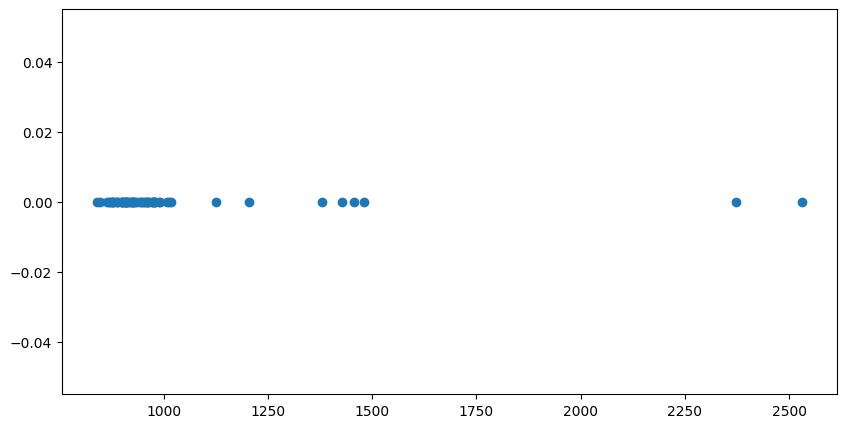

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(number_of_transaction,alpha_star)